In [20]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_union, make_pipeline, Pipeline
from sklearn.model_selection import ParameterGrid

from sklearn.impute import MissingIndicator, KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler

from fenginering.function import *
from fenginering.indicator import *
from fenginering.transformer import *
from fenginering.preprocessing import Crossover
from fenginering.preprocessing import Scale
from data.get_data import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
start = "2020"
end = "2023"
data = get_data('SOL', '1h').loc[start : end]
BTC = get_data('BTC', '1h').loc[start : end]
data['btc'] = BTC.close.pct_change()
data.drop(columns = ['symbol'], inplace = True)
data.columns = data.columns.astype(str)

prod = data.close.pct_change()*3
prod = prod.resample('8h').apply(lambda x : (x+1).cumprod())
data = data.resample('8h').last()
data['prod'] = prod

print(data.shape)


data['returns'] = data.close.pct_change()
data.dropna(inplace=True)
data['target'] = data['returns'].rolling(3).mean()
data['target'] = data['target'].shift(-2)
data.dropna(inplace=True)

data['target'] = np.where(data['target'] > 0, 1, 0)

data.head()

(2935, 7)


C:\Users\cc\AppData\Local\Temp/ipykernel_30796/4097893487.py:10: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



,open,high,low,close,volume,btc,prod,returns,target
time,,,,,,,,,
2020-08-11 08:00:00,3.2499,3.3926,3.1500,3.1900,170827.90,-0.008137,1.038598,0.091569,1
2020-08-11 16:00:00,3.2037,3.3191,3.2000,3.2985,43097.80,0.003604,1.054075,0.034013,1
2020-08-12 00:00:00,3.2538,3.3661,3.2121,3.3661,60332.39,0.010140,0.831014,0.020494,1
2020-08-12 08:00:00,3.8272,3.8500,3.7000,3.7678,41862.48,-0.000248,1.075042,0.119337,1
2020-08-12 16:00:00,3.6732,3.7559,3.6732,3.7558,18397.37,0.001736,0.991321,-0.003185,1


In [27]:
px.histogram(prod-1)

In [30]:
dd = get_data('SOL', '1d').loc[start : end]
px.histogram(dd.close.pct_change())

In [ ]:
data['btc-1'] = data['btc'].shift(-1)
data['btc-2'] = data['btc'].shift(-2)

data['rets-2'] = data['returns'].shift(-2)
data['rets-4'] = data['returns'].shift(-4)
data['rets-5'] = data['returns'].shift(-5)

In [ ]:
sma_list = [3, 7, 10, 14, 21, 28, 30]
#sma_list_h = range(3, 2, 200)

cross = Crossover(data)
df = cross.ma(sma, sma_list)

data = data.join(df)

In [ ]:
norm_scale = Scale(data)
data = norm_scale.transform()
data.dropna(inplace = True)

data.head()

,btc,returns,target,btc-1,btc-2,rets-2,rets-4,rets-5,sma_3_sma_7,sma_3_sma_7dist,...,sma_14_sma_30,sma_14_sma_30dist,sma_21_sma_28,sma_21_sma_28dist,sma_21_sma_30,sma_21_sma_30dist,sma_28_sma_30,sma_28_sma_30dist,sma_28_sma_30_c,h_l
time,,,,,,,,,,,,,,,,,,,,,
2020-08-21 00:00:00,0.001083,-0.041201,0,-0.001342,-0.001879,-0.026886,0.091266,-0.015812,0.0,1.961119,...,1.0,2.065094,1.0,2.037402,1.0,2.035043,0.0,1.997726,2.093434,0.021720
2020-08-21 08:00:00,-0.001342,-0.019240,0,-0.001879,0.001347,-0.043217,-0.015812,0.019817,0.0,1.992331,...,1.0,2.072364,1.0,2.042181,1.0,2.041892,0.0,1.999723,2.110694,0.063824
2020-08-21 16:00:00,-0.001879,-0.026886,1,0.001347,-0.003120,0.091266,0.019817,0.018813,1.0,2.018652,...,1.0,2.075052,1.0,2.040258,1.0,2.045499,1.0,2.005038,2.131196,0.027251
2020-08-22 00:00:00,0.001347,-0.043217,1,-0.003120,-0.000102,-0.015812,0.018813,0.038305,1.0,2.045708,...,1.0,2.076994,1.0,2.040745,1.0,2.050879,1.0,2.009737,2.170186,0.019483
2020-08-22 08:00:00,-0.003120,0.091266,1,-0.000102,0.000734,0.019817,0.038305,0.060892,1.0,2.043036,...,1.0,2.070556,1.0,2.035027,1.0,2.049293,1.0,2.013783,2.060448,0.016288


In [ ]:
#data['vol'] = data['ret_1_0'].ewm(span=5).std()
#data.dropna(inplace = True)

<AxesSubplot: >

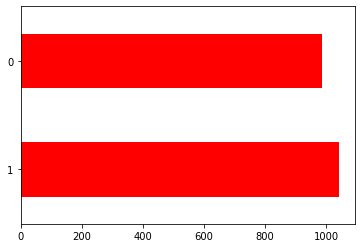

In [ ]:
N = data.shape[0]
n = int(0.7*N)
train = data[:n]
test = data[n:]

features, target = train.drop(columns = ['target']), train['target']
features_test, target_test = test.drop(columns = ['target']), test['target']


target.value_counts().plot(kind = 'barh', color = 'red')

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

exp_cv = TimeSeriesSplit(n_splits = 10)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE, RFECV

#selector = SelectFromModel(model)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(features, target)

DecisionTreeClassifier()

 Accuracy : 0.76 
 f1 : 0.74 
 precision : 0.73 
 recall : 0.74 
 AUC : 0.76 
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       470
           1       0.73      0.74      0.74       400

    accuracy                           0.76       870
   macro avg       0.75      0.76      0.76       870
weighted avg       0.76      0.76      0.76       870



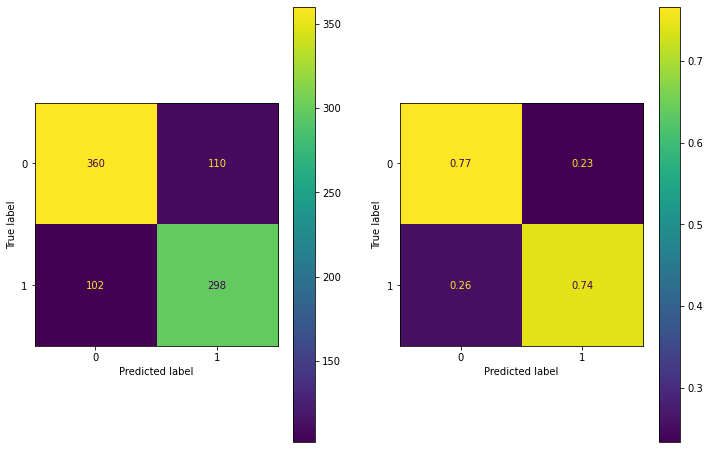

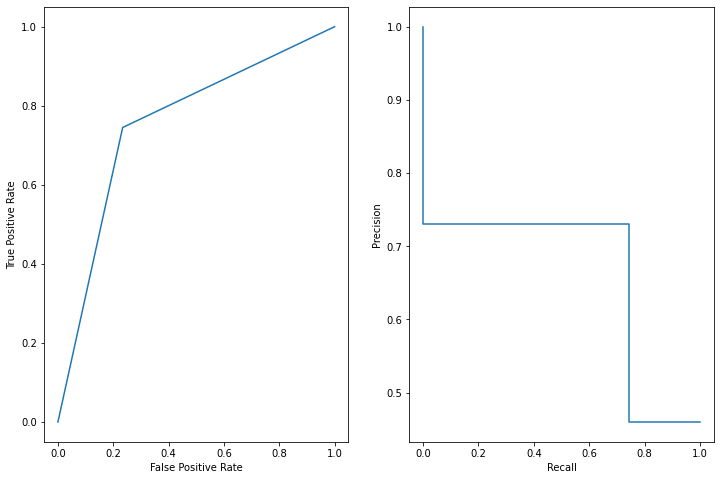

In [ ]:
y_pred = model.predict(features_test)
y_pred_proba = model.predict_proba(features_test)

from evaluation.classification import *

evaluation = Evaluation(y_true = target_test, y_pred = y_pred, proba_pred = y_pred_proba[:,1])
evaluation.metrics()
evaluation.show()

<AxesSubplot: >

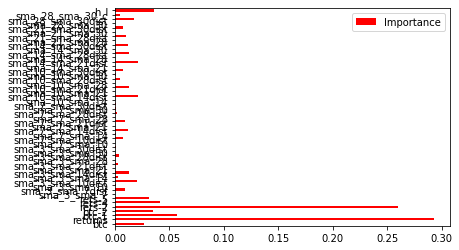

In [ ]:
Importance = pd.DataFrame(model.feature_importances_, index = model.feature_names_in_, columns=['Importance'])
Importance.plot(kind = 'barh', color = 'red')

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

#plt.figure(figsize=(20, 10))
#tree.plot_tree(model, filled = True)

In [ ]:
from jyquickhelper import RenderJsVis
from sklearn.tree import export_graphviz

dot = export_graphviz(clf, out_file=None)
RenderJsVis(dot=dot, height="400px", layout='hierarchical')

In [ ]:
import joblib
#joblib.dump(model, 'model_file/test_00.joblib')

# backtest

In [ ]:
import plotly.express as px

def backtest(features_test, target_test):
    backtest = pd.DataFrame()
    backtest['returns'] = features_test.returns
    backtest['target'] = target_test
    backtest['pred'] = y_pred
    backtest['pred_proba'] = y_pred_proba[:,0]

    backtest['cum_ret'] = (1 + backtest['returns']).cumprod()

    backtest['strategy'] = backtest['returns']*backtest['pred']
    backtest['strategy_cum_ret'] = (1 + backtest['strategy']).cumprod()
    
    #backtest[['cum_ret', 'strategy_cum_ret']].plot(figsize = (15, 10))
    fig = px.line(backtest[['cum_ret', 'strategy_cum_ret']])
    fig.show()
    
    return backtest

bt = backtest(features_test, target_test)

In [ ]:
import plotly.express as px

px.histogram(bt.returns)